Dataset Overview:
   Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0       

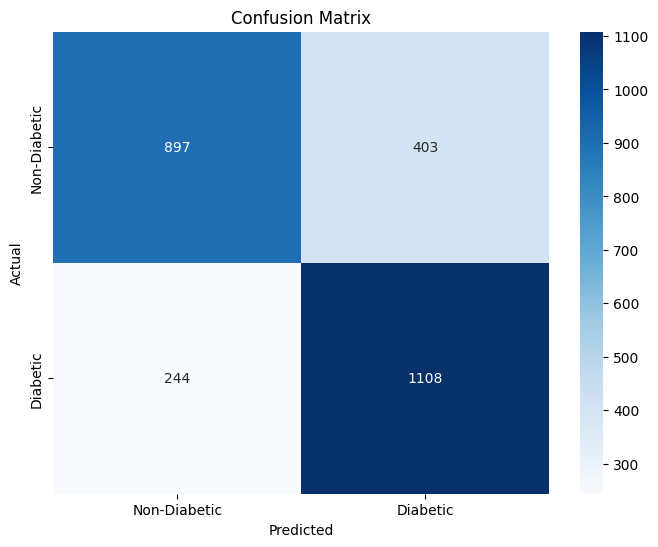

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("food_items.csv")

# Inspect the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Clean and encode the target column
df['class'] = df['class'].str.strip('\'"')  # Remove both single and double quotes
df['Diabetic'] = df['class'].apply(lambda x: 1 if x == 'In Moderation' else 0)

# Check class distribution
print("\nClass Distribution:")
print(df['Diabetic'].value_counts())

# Define features and target
X = df.drop(columns=['class', 'Diabetic'])
y = df['Diabetic']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model with increased max_iter
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('food_items.csv')

# Inspect the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Overview:
   Calories  Total Fat  Saturated Fat  Monounsaturated Fat  \
0     149.0          0            0.0                  0.0   
1     123.0          0            0.0                  0.0   
2     150.0          0            0.0                  0.0   
3     110.0          0            0.0                  0.0   
4     143.0          0            0.0                  0.0   

   Polyunsaturated Fat  Trans Fat  Cholesterol  Sodium  Total Carbohydrate  \
0                  0.0        0.0            0     9.0                 9.8   
1                  0.0        0.0            0     5.0                 6.6   
2                  0.0        0.0            0     4.0                11.4   
3                  0.0        0.0            0     6.0                 7.0   
4                  0.0        0.0            0     7.0                13.1   

   Dietary Fiber  Sugars  Sugar Alcohol  Protein  Vitamin A  Vitamin C  \
0            0.0     0.0              0      1.3          0       

In [7]:
X_raw = df.iloc[:, :-1]
y_raw = df.iloc[:, -1:]


In [8]:
X_raw

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,140.0,5,1.0,0.0,0.0,0.0,0,60.0,23.0,2.0,13.0,0,2.0,0,0,0,4
13256,130.0,4,0.5,0.0,0.0,0.0,0,50.0,23.0,1.0,14.0,0,2.0,0,0,0,4
13257,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2
13258,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2


In [9]:
scaler = MinMaxScaler()
# Scaling the raw input features.
X = scaler.fit_transform(X_raw)

# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Encode the target variable
y = label_encoder.fit_transform(y_raw.values.ravel())
# Note that ravel() function flattens the vector.

# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [10]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty = 'l2'

# Our classification problem is multinomial
multi_class = 'multinomial'

# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'

# Max iteration = 1000
max_iter = 1000

# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=123, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

l2_model.fit(X_train, y_train)


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [11]:
y_pred = l2_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Model Evaluation:
Accuracy: 0.7748868778280543

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.80      1330
           1       0.84      0.73      0.78      1124
           2       0.92      0.35      0.51       198

    accuracy                           0.77      2652
   macro avg       0.83      0.65      0.70      2652
weighted avg       0.79      0.77      0.77      2652

[[1162  162    6]
 [ 301  823    0]
 [ 128    0   70]]
